# Jupyter intro

### Useful shortcuts:
- Shift + Tab - function tooltip
- Shift + Tab + Tab - more detailed function info
- Tab - autocomplete list
- Shift + Enter - run cell

# Pandas intro

### Load all libraries needed

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn # for prettier plots, probably need to install it => conda install seaborn
%matplotlib inline

### Load datasets
All datasets are complete, there is no holes in them. Time represents number of hours from 2005-01-01.

In [2]:
with open('weather.pickle', 'rb') as file:
    weather = pickle.load(file)
with open('smog.pickle', 'rb') as file:
    smog = pickle.load(file)
    # smog -> dictionary, key is station number as string ex.
    # smog['6']['data']

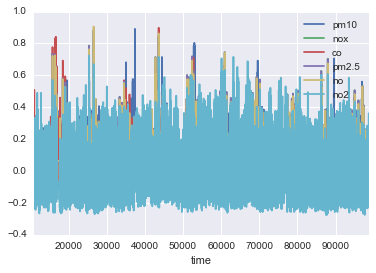

In [3]:
smog['6']['data'].plot(x='time')

#### About normalization
Datasets are also normalized.
To convert data back to original form use:
$$o = d \cdot (o_{max} - o_{min}) + o_{mean}$$
```python
# Ex.
smog_origin = smog[STATION]['data'] * (smog[STATION]['max'] - smog[STATION]['min']) + smog[STATION]['mean']
```

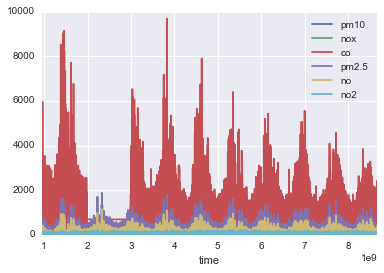

In [4]:
smog_origin = smog['6']['data'] * (smog['6']['max'] - smog['6']['min']) + smog['6']['mean']
smog_origin.plot(x='time')

### Useful functions for unnormalizing data

In [5]:
def unnormalize(x, min_value, max_value, mean_value):
    return x * (max_value - min_value) + mean_value

In [6]:
def unnormalize_smog(x, station, substance):
    return unnormalize(x, smog[station]['min'][substance], smog[station]['max'][substance], smog[station]['mean'][substance])

In [7]:
def unnormalize_weather(x, what):
    return unnormalize(x, weather['min'][what], weather['max'][what], weather['mean'][what])

### For converting `time` column

In [8]:
def hours_to_date(x):
    base_time = pd.to_datetime('2005-01-01').to_datetime64().astype('int64')
    return pd.to_datetime(base_time // 1000000000 + x * 3600, unit='s')

In [9]:
def date_to_hours(date):
    if type(date) == type(''):
        date = pd.to_datetime(date)
    base_date = pd.to_datetime('2005-01-01').to_datetime64().astype('int64')
    return int((date.to_datetime64().astype('int64') - base_date) // 3600000000000)

### Join DataFrames

In [10]:
weather_smog_data = pd.merge(weather['data'], smog['7']['data'], on='time')
print(len(weather_smog_data))
weather_smog_data[:10]

41276


,time,wind-direction,humidity,pressure,wind-speed,rain,temperature,pm10,nox,co,pm2.5,o3,co-8h,no,c6h6,no2,so2
0,57460,-0.057152,0.170383,-0.136990,-0.099634,-0.008514,0.026935,-0.065028,-0.038616,-0.072972,-0.038587,-0.025688,-0.019447,-0.030269,0.010008,-0.090600,0.001951
1,57461,0.216121,0.136665,-0.133680,-0.080537,-0.008514,0.027804,-0.063578,-0.032420,-0.069639,-0.032390,-0.025688,-0.019447,-0.028960,0.010008,-0.053791,0.001951
2,57462,0.114019,0.039774,-0.130070,-0.096162,-0.008514,0.050224,-0.063578,-0.025448,-0.069639,-0.032390,-0.025688,-0.019447,-0.028960,0.010008,-0.053791,0.001951
3,57463,-0.126221,0.012073,-0.127813,-0.097898,-0.008514,0.070731,-0.060680,-0.018477,-0.049642,-0.018447,-0.018254,-0.019447,-0.019797,0.010008,-0.023116,0.001951
4,57464,0.135040,-0.053232,-0.125857,0.123456,-0.008514,0.097321,-0.062129,-0.019252,-0.049642,-0.019222,-0.014537,-0.019447,-0.018488,0.010008,-0.023116,0.001951
5,57465,0.159064,-0.191236,-0.123300,0.331789,-0.008514,0.122869,-0.063578,-0.024674,-0.062973,-0.024644,-0.018254,-0.019447,-0.021106,0.010008,-0.053791,0.001951
6,57466,0.204109,-0.232349,-0.119087,0.267553,-0.008514,0.128256,-0.063578,-0.030871,-0.072972,-0.030841,-0.010820,-0.019447,-0.023724,0.010008,-0.084465,0.001951
7,57467,0.261167,-0.239870,-0.116830,0.203317,-0.008514,0.143376,-0.065028,-0.031645,-0.077971,-0.031616,-0.010820,-0.019447,-0.025033,0.010008,-0.084465,0.001951
8,57468,0.180085,-0.250399,-0.115176,0.140817,-0.008514,0.157453,-0.066477,-0.033969,-0.077971,-0.033939,-0.021971,-0.019447,-0.025033,0.010008,-0.090600,0.001951
9,57469,0.207112,-0.289632,-0.115777,0.169463,-0.008514,0.172747,-0.065028,-0.033194,-0.071305,-0.033165,-0.025688,-0.019447,-0.026342,0.010008,-0.084465,0.001951


## Explore datasets

In [11]:
weather['data'][:10] # select ten first rows

,time,wind-direction,humidity,pressure,wind-speed,rain,temperature
0,57460,-0.057152,0.170383,-0.136990,-0.099634,-0.008514,0.026935
1,57461,0.216121,0.136665,-0.133680,-0.080537,-0.008514,0.027804
2,57462,0.114019,0.039774,-0.130070,-0.096162,-0.008514,0.050224
3,57463,-0.126221,0.012073,-0.127813,-0.097898,-0.008514,0.070731
4,57464,0.135040,-0.053232,-0.125857,0.123456,-0.008514,0.097321
5,57465,0.159064,-0.191236,-0.123300,0.331789,-0.008514,0.122869
6,57466,0.204109,-0.232349,-0.119087,0.267553,-0.008514,0.128256
7,57467,0.261167,-0.239870,-0.116830,0.203317,-0.008514,0.143376
8,57468,0.180085,-0.250399,-0.115176,0.140817,-0.008514,0.157453
9,57469,0.207112,-0.289632,-0.115777,0.169463,-0.008514,0.172747


In [12]:
weather['data'][['rain', 'temperature']].head() # select multiple columns

,rain,temperature
0,-0.008514,0.026935
1,-0.008514,0.027804
2,-0.008514,0.050224
3,-0.008514,0.070731
4,-0.008514,0.097321


In [13]:
weather['data'][weather['data']['temperature'] < 0.1].head()
# select all rows where temperature is less than 0.1 (remember data are normalized so it doean't mean below 0.1*C)

,time,wind-direction,humidity,pressure,wind-speed,rain,temperature
0,57460,-0.057152,0.170383,-0.136990,-0.099634,-0.008514,0.026935
1,57461,0.216121,0.136665,-0.133680,-0.080537,-0.008514,0.027804
2,57462,0.114019,0.039774,-0.130070,-0.096162,-0.008514,0.050224
3,57463,-0.126221,0.012073,-0.127813,-0.097898,-0.008514,0.070731
4,57464,0.135040,-0.053232,-0.125857,0.123456,-0.008514,0.097321


In [14]:
weather_tmp = weather['data'][:] # [:] copies arrays
weather_tmp['sin(temp)'] = np.sin(weather_tmp['temperature'])

C:\Users\grzeg\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [15]:
weather_tmp.head()

,time,wind-direction,humidity,pressure,wind-speed,rain,temperature,sin(temp)
0,57460,-0.057152,0.170383,-0.136990,-0.099634,-0.008514,0.026935,0.026932
1,57461,0.216121,0.136665,-0.133680,-0.080537,-0.008514,0.027804,0.027801
2,57462,0.114019,0.039774,-0.130070,-0.096162,-0.008514,0.050224,0.050203
3,57463,-0.126221,0.012073,-0.127813,-0.097898,-0.008514,0.070731,0.070672
4,57464,0.135040,-0.053232,-0.125857,0.123456,-0.008514,0.097321,0.097168


# Scikit learn - Regression intro

In [16]:
from sklearn import linear_model

### Simple example

In [17]:
smog_model = linear_model.LinearRegression(n_jobs=8) # create model

### Prepare features and target
We are trying to predict values of `nox` substance.

In [18]:
# copy all data
smog_features = smog['7']['data'][:]
# add new features if needed
smog_features['sin(time)'] = np.sin(0.001 * smog_features['time'])

features = np.array(smog_features[-10001:-1])
print(features)
print(len(features))

# select target
target = np.array(
    smog_features['nox'][-10000:] # targets are shifted by 1 because we are trying to predict future
).T
print(target)
print(len(target)) # lengths of features and target should be the same

[[  8.87350000e+04   1.69754836e-01   5.82851864e-02 ...,  -1.69806890e-02
    1.92381905e-02   6.96426437e-01]
 [  8.87360000e+04   1.50914256e-01   7.18405698e-02 ...,  -2.31156583e-02
    1.95949049e-02   6.97143717e-01]
 [  8.87370000e+04   2.08885271e-01   6.04540477e-02 ...,   3.82340350e-02
    2.83997041e-02   6.97860300e-01]
 ..., 
 [  9.87320000e+04  -8.52081623e-03   2.50988967e-02 ...,   1.70918698e-01
    2.26625098e-02  -9.74082283e-01]
 [  9.87330000e+04   1.49561403e-02   1.97050934e-02 ...,   1.63284342e-01
    2.00233774e-02  -9.74307990e-01]
 [  9.87340000e+04   7.02780244e-02   2.61207402e-02 ...,   1.33095998e-01
    1.72428052e-02  -9.74532722e-01]]
10000
[ 0.07184057  0.06045405  0.07277008 ...,  0.01970509  0.02612074
  0.00735746]
10000


C:\Users\grzeg\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Training simple model

In [19]:
smog_model.fit(features, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=False)

### Check predictions

In [20]:
smog_model.score(features, target)

0.70072140098884683

### Simple plot

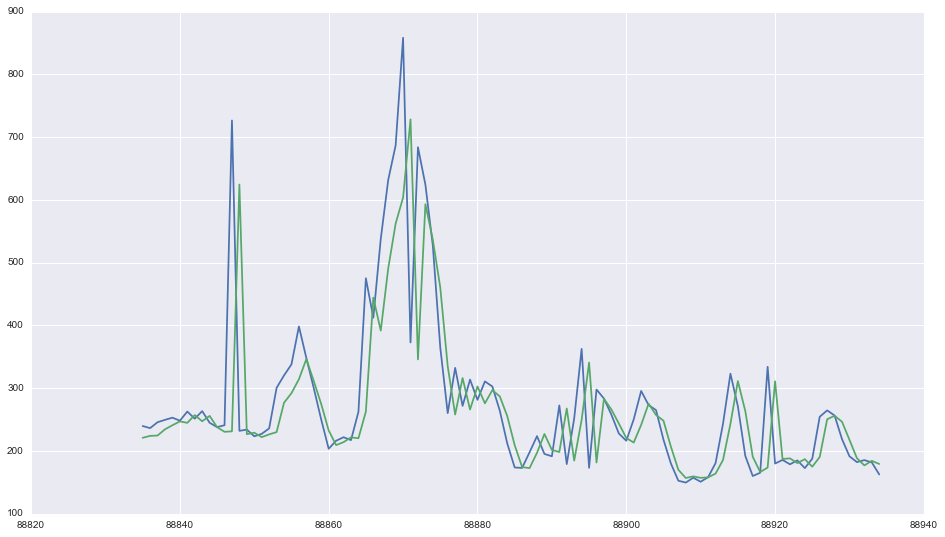

In [21]:
prediction = smog_model.predict(features)
plt.figure(figsize=(16, 9))
plt.plot(features[:, 0][100:200], unnormalize_smog(target, '6', 'nox')[100:200])
plt.plot(features[:, 0][100:200], unnormalize_smog(prediction, '6', 'nox')[100:200])
plt.show()

# Actual work
We will work on `weather_smog` dataset, but first we need to split it on train, validation, test sets. We will always train our model on train set then try to evaluate it on validation set and fine-tune hyper-parameters. At the very end we will check our model on test set.

In [22]:
weather_smog = pd.merge(weather['data'], smog['7']['data'], on='time') # for now we only use station 7

In [23]:
from sklearn.cross_validation import train_test_split
def split_data(X, y):
    train_X, valid_test_X, train_y, valid_test_y = train_test_split(X, y, test_size=0.4, random_state=42)
    valid_X, test_X, valid_y, test_y = train_test_split(valid_test_X, valid_test_y, test_size=0.5, random_state=17)
    return train_X, train_y, valid_X, valid_y, test_X, test_y

In [24]:
def create_and_fit_model(X, y):
    model = linear_model.LinearRegression(n_jobs=8)
    model.fit(X, y)
    return model

In [25]:
def plot_fitted_data(model, X, y, begin=0, end=100, station='7', substance='co'):
    prediction = model.predict(X)
    plt.figure(figsize=(16, 9))
    tmp = X[:]
    tmp['target'] = y
    tmp['pred'] = prediction
    tmp = tmp.sort_values(by='time')
    plt.plot(tmp['time'][begin:end], unnormalize_smog(tmp['target'], station, substance)[begin:end])
    plt.plot(tmp['time'][begin:end], unnormalize_smog(tmp['pred'], station, substance)[begin:end])
    plt.show()

#### Example with 'co' substance

In [26]:
# add target column
weather_smog['target'] = weather_smog['co']
# shift data by one hour, because we are trying to predict future
weather_smog['target'][0:-1] = weather_smog['co'][1:]
# remove last row (there is no data for it)
weather_smog.drop(weather_smog.index[-1], inplace=True)

C:\Users\grzeg\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
weather_smog.head()

,time,wind-direction,humidity,pressure,wind-speed,rain,temperature,pm10,nox,co,pm2.5,o3,co-8h,no,c6h6,no2,so2,target
0,57460,-0.057152,0.170383,-0.136990,-0.099634,-0.008514,0.026935,-0.065028,-0.038616,-0.072972,-0.038587,-0.025688,-0.019447,-0.030269,0.010008,-0.090600,0.001951,-0.069639
1,57461,0.216121,0.136665,-0.133680,-0.080537,-0.008514,0.027804,-0.063578,-0.032420,-0.069639,-0.032390,-0.025688,-0.019447,-0.028960,0.010008,-0.053791,0.001951,-0.069639
2,57462,0.114019,0.039774,-0.130070,-0.096162,-0.008514,0.050224,-0.063578,-0.025448,-0.069639,-0.032390,-0.025688,-0.019447,-0.028960,0.010008,-0.053791,0.001951,-0.049642
3,57463,-0.126221,0.012073,-0.127813,-0.097898,-0.008514,0.070731,-0.060680,-0.018477,-0.049642,-0.018447,-0.018254,-0.019447,-0.019797,0.010008,-0.023116,0.001951,-0.049642
4,57464,0.135040,-0.053232,-0.125857,0.123456,-0.008514,0.097321,-0.062129,-0.019252,-0.049642,-0.019222,-0.014537,-0.019447,-0.018488,0.010008,-0.023116,0.001951,-0.062973


In [28]:
# create list of feature columns
feature_columns = list(weather_smog.columns)
feature_columns.remove('target')
target_column = 'target'

In [29]:
# split dataset
train_X, train_y, valid_X, valid_y, test_X, test_y = split_data(weather_smog[feature_columns], weather_smog[target_column])
print("Train set size:", len(train_X))
print("Valid set size:", len(valid_X))
print("Test  set size:", len(test_X))

Train set size: 24765
Valid set size: 8255
Test  set size: 8255


In [30]:
# train ONLY on train_X, train_y
simple_co_model = create_and_fit_model(train_X, train_y)

In [31]:
# check prediction score on validation set! THIS IS THE MOST IMPORTANT SCORE
print("Validation score:", simple_co_model.score(valid_X, valid_y))

Validation score: 0.765039413719


C:\Users\grzeg\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\grzeg\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


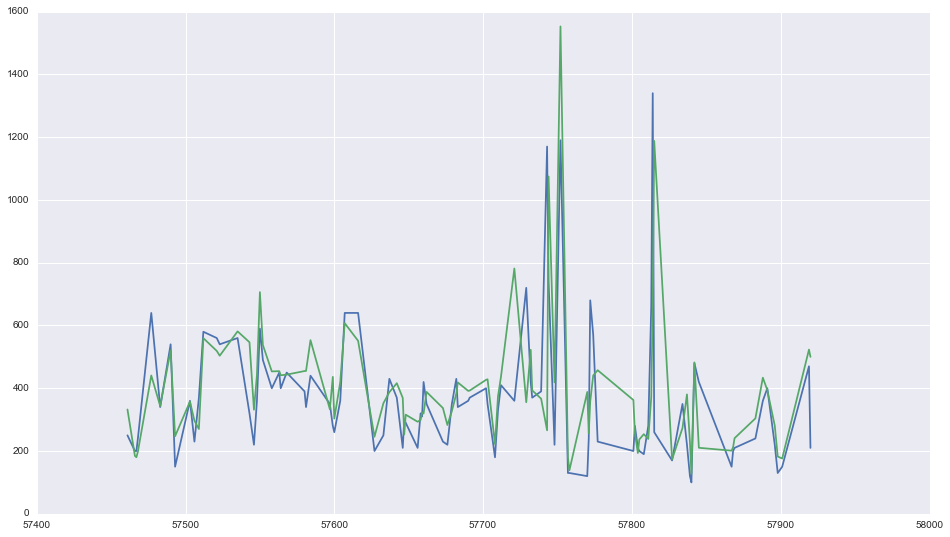

In [32]:
# plot actual value with predicted value
plot_fitted_data(simple_co_model, valid_X, valid_y)

# Have fun!

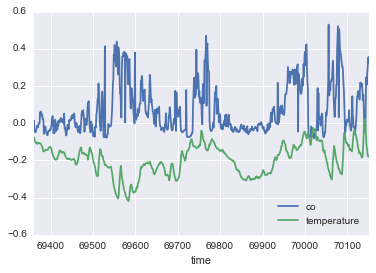

In [33]:
tmp = weather_smog[(date_to_hours('2012-11-30') < weather_smog['time']) & (weather_smog['time'] < date_to_hours('2013-01-02'))]
tmp[['time', 'co', 'temperature']].plot(x='time')

## Prepare targets for all data

In [34]:
ws_data = weather_smog.drop('target', axis=1)

In [35]:
features = list(ws_data.columns)
features.remove('time')
for feature in features:
    target = feature + '-target'
    ws_data[target] = ws_data[feature]
    ws_data[target][:-1] = ws_data[feature][1:]
ws_data = ws_data.drop(ws_data.index[-1])

C:\Users\grzeg\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Add new features here

In [ ]:
# new features

# Make model for all labels

In [36]:
def split_data(data, size, rnd=42):
    dataset = data.reindex(np.random.permutation(data.index))
    length = int(len(data) * size)
    return dataset[:length], dataset[length:]

In [37]:
def prepare_target_for_label(data, target):
    data['target'] = data[target]
    data['target'][0:-1] = data[target][1:]
    return data.drop(data.index[-1])

In [38]:
train, valid_test = split_data(ws_data, 0.6)
valid, test = split_data(valid_test, 0.5)
print("Train size:", len(train))
print("Valid size:", len(valid))
print("Test  size:", len(test))

Train size: 24764
Valid size: 8255
Test  size: 8255


In [51]:
def make_model_for_label(data, features, target):
    return create_and_fit_model(np.array(data[features]), np.array(data[target + '-target']))

In [52]:
models = {}
for label in features:
    models[label] = make_model_for_label(train, features, label)

In [53]:
models

{'c6h6': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=False),
 'co': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=False),
 'co-8h': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=False),
 'humidity': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=False),
 'no': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=False),
 'no2': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=False),
 'nox': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=False),
 'o3': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=False),
 'pm10': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=False),
 'pm2.5': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=False),
 'pressure': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=False),
 'rain': LinearRegression(copy_X=True, fi

In [58]:
for name, model in models.items():
    print((name + ': ').ljust(17) + str(model.score(valid[features], valid[name + '-target'])))

no2:             0.721349476303
wind-speed:      0.852209722314
pm10:            0.79241999656
no:              0.720265746438
pm2.5:           0.736425018164
temperature:     0.990146574932
nox:             0.738085542467
pressure:        0.997756605048
wind-direction:  0.793224965658
co:              0.751913868118
so2:             0.827501252276
humidity:        0.940594585462
c6h6:            0.939653835859
o3:              0.750879332054
co-8h:           0.940189857439
rain:            0.831838417389
